In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
dataset=pd.read_csv("PH-Sales.csv")

In [64]:
dataset.head(12)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
5,Jun-03,189
6,Jul-03,207
7,Aug-03,207
8,Sep-03,171
9,Oct-03,150


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [66]:
pd.date_range(start='1/1/2018', periods=8)


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [67]:
pd.date_range(start='2022-07-30',periods=7)

DatetimeIndex(['2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', freq='D')

In [68]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [69]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [70]:
pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [71]:
dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [72]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [73]:
dataset['month']=dates.month
dataset['year']=dates.year

In [74]:
dataset

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [75]:
import calendar
calendar.month_abbr[1]

'Jan'

In [76]:
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_abbr[x])


In [77]:
dataset.head(12)

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003
5,Jun-03,189,Jun,2003
6,Jul-03,207,Jul,2003
7,Aug-03,207,Aug,2003
8,Sep-03,171,Sep,2003
9,Oct-03,150,Oct,2003


In [78]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [79]:
dataset.head()

,Month-Year,Tractor-Sales,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [80]:
dataset.set_index(dates,inplace=True)

In [81]:
dataset=dataset[["Tractor-Sales","month","year"]]

In [82]:
ts_sales=dataset['Tractor-Sales']

<AxesSubplot:>

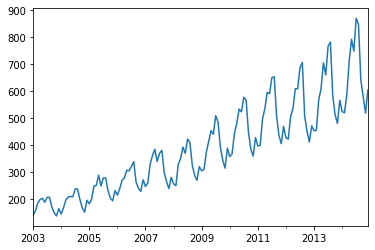

In [83]:
ts_sales.plot()


In [84]:
#decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [85]:
decompose=seasonal_decompose(ts_sales)

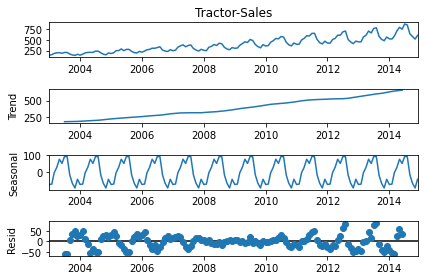

In [86]:
decompose.plot();

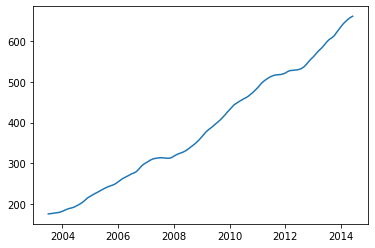

In [87]:
plt.plot(decompose.trend)

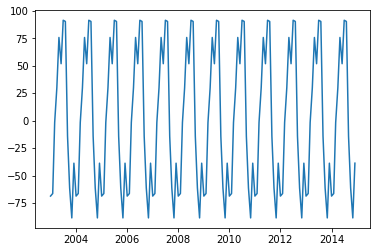

In [88]:
plt.plot(decompose.seasonal)

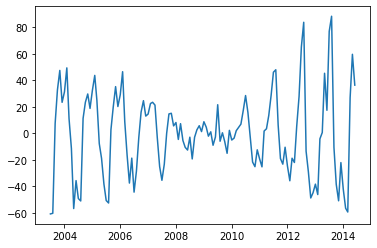

In [89]:
plt.plot(decompose.resid)

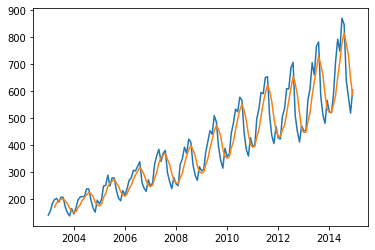

In [90]:
#rolling stats
#simple moving average
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=4).mean())

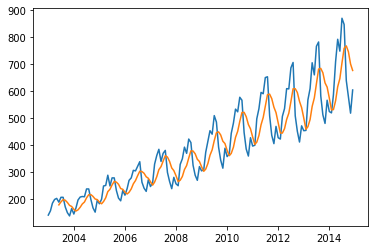

In [91]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=6).mean())

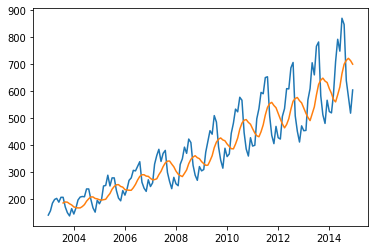

In [92]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=8).mean())

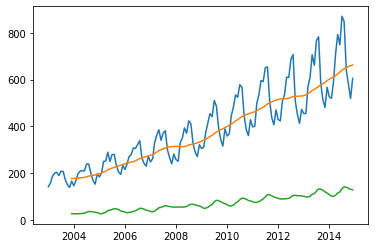

In [93]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).mean())
plt.plot(ts_sales.rolling(window=12).std())

In [94]:
# some more visualization
dataset.head(3)

,Tractor-Sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003


In [95]:
update_data = pd.pivot(dataset,values="Tractor-Sales",index="month",columns='year')
update_data

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [96]:
update_data.reindex(index=range(0,12))
update_data.reindex(index=["Jan","Feb","Mar","Apr","May","Jun",
                           "Jul","Aug","Sep","Oct","Nov","Dec"])

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='month'>

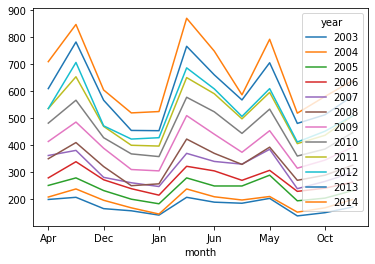

In [97]:
update_data.plot()

<AxesSubplot:xlabel='year'>

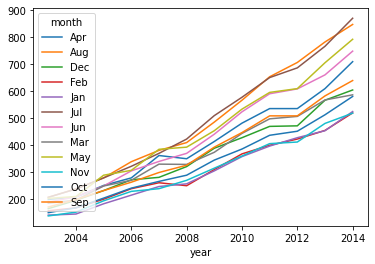

In [98]:
pd.pivot(dataset,values="Tractor-Sales",index="year",columns='month').plot()


In [99]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

<AxesSubplot:>

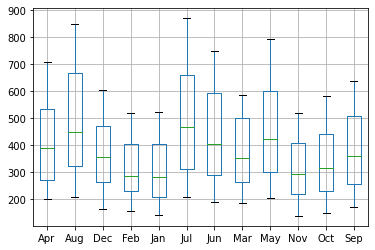

In [100]:
pd.pivot(dataset,values="Tractor-Sales",index="year",columns='month').boxplot()


In [101]:
import seaborn as sns 
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tractor-Sales', ylabel='Density'>

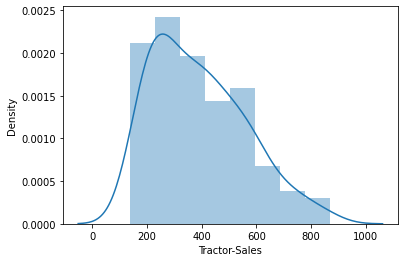

In [102]:
sns.distplot(ts_sales)

In [103]:
# augmented dicky fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(ts_sales)

(1.1088250591467403,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [104]:
# write function to check data is stationary or not 
from cProfile import label


def test_stationary(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.figure(figsize=(18,10))
    plt.grid('both')
    plt.plot(timeseries)
    plt.plot(rolmean,label="rol_mean")
    plt.plot(rolstd,label="rol_std")
    print("-"*30)
    print("Results of Dicky-Fuller Test:")
    df_test = adfuller(timeseries,autolag='AIC')
    df_output = pd.Series(df_test[0:4],index=['Test Statistic',
                    'p-value','#lags Used','Number of Observation Used'
                ])
    for key, value in df_test[4].items():
        df_output['Confidence Interval (%s)'%key] = value
    print(df_output)

------------------------------
Results of Dicky-Fuller Test:
Test Statistic                  1.108825
p-value                         0.995291
#lags Used                     14.000000
Number of Observation Used    129.000000
Confidence Interval (1%)       -3.482088
Confidence Interval (5%)       -2.884219
Confidence Interval (10%)      -2.578864
dtype: float64


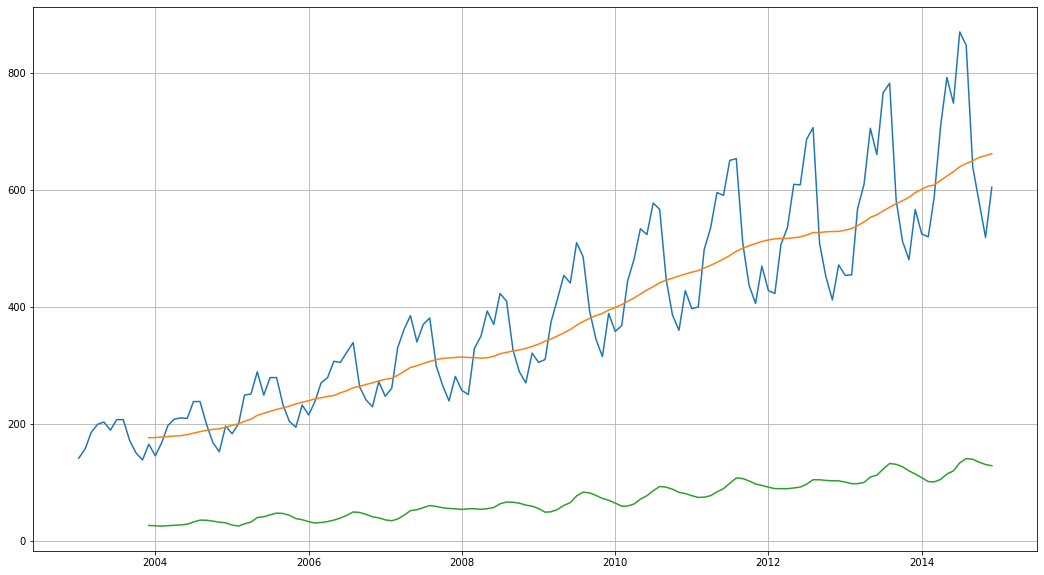

In [105]:
test_stationary(ts_sales)

In [106]:
import numpy as np 
log_diff_data = np.log(ts_sales).diff(periods=1).dropna()

------------------------------
Results of Dicky-Fuller Test:
Test Statistic                 -2.680467
p-value                         0.077480
#lags Used                     14.000000
Number of Observation Used    128.000000
Confidence Interval (1%)       -3.482501
Confidence Interval (5%)       -2.884398
Confidence Interval (10%)      -2.578960
dtype: float64


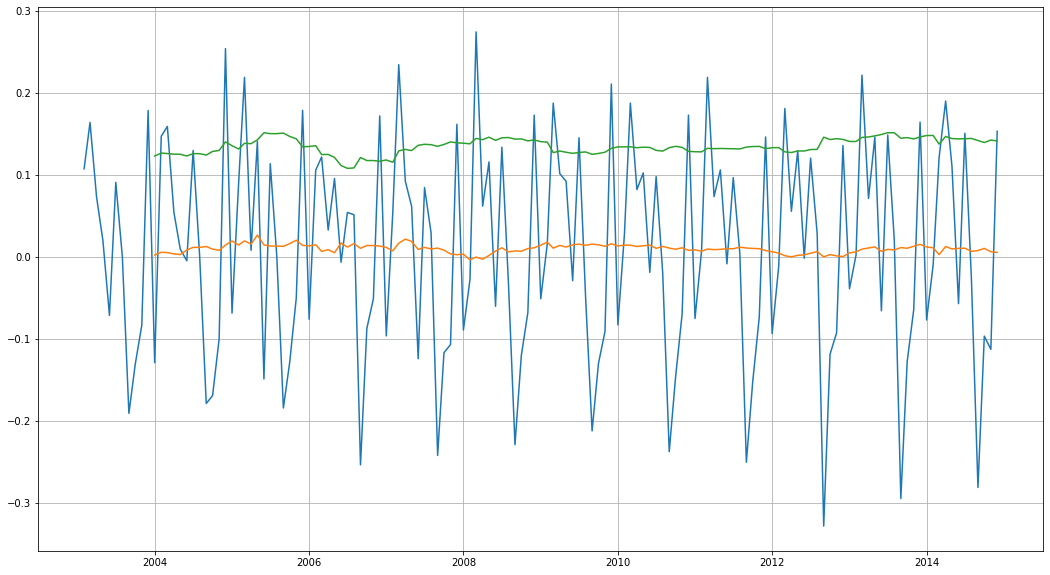

In [107]:
test_stationary(log_diff_data)

------------------------------
Results of Dicky-Fuller Test:
Test Statistic                 -3.200722
p-value                         0.019943
#lags Used                     11.000000
Number of Observation Used    130.000000
Confidence Interval (1%)       -3.481682
Confidence Interval (5%)       -2.884042
Confidence Interval (10%)      -2.578770
dtype: float64


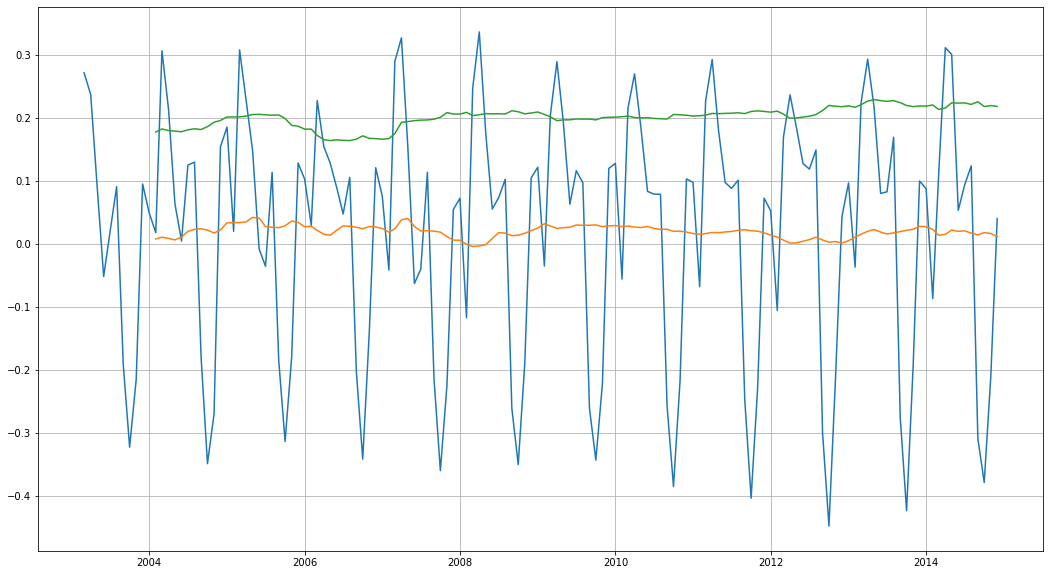

In [108]:
import numpy as np 
log_diff_data2 = np.log(ts_sales).diff(periods=2).dropna()
test_stationary(log_diff_data2)

------------------------------
Results of Dicky-Fuller Test:
Test Statistic                 -2.543481
p-value                         0.105250
#lags Used                     14.000000
Number of Observation Used    128.000000
Confidence Interval (1%)       -3.482501
Confidence Interval (5%)       -2.884398
Confidence Interval (10%)      -2.578960
dtype: float64


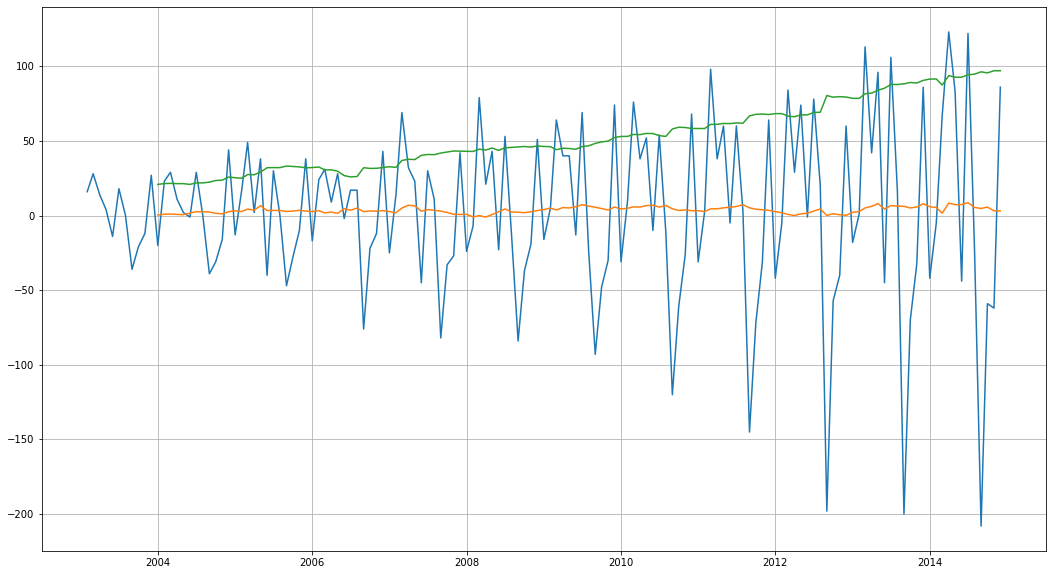

In [109]:
# make stationary
one_diff_data = ts_sales.diff(periods=1)
one_diff_data.dropna(inplace=True)
test_stationary(one_diff_data)

In [110]:
# Arima Sarima 
# pacf acf
# AIC BIC
# MSE
# prediction
# outofbox forcasting


In [111]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt 
import statsmodels.formula.api as smf

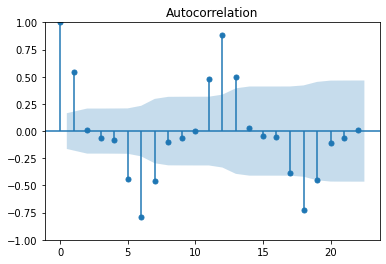

In [112]:
# pacf acf
smt.graphics.plot_acf(log_diff_data2);

In [113]:
# ACF is to get correlation with in the same variable time to time

c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


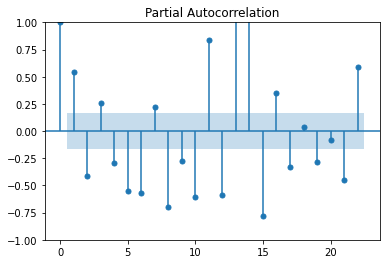

In [114]:
smt.graphics.plot_pacf(log_diff_data2);

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(data,order=())
# model.fit()
# model.forecast()

In [ ]:
# mse
# np.sqrt(mean_squared_error(y,prediction))

In [ ]:
# ARIMA
# p,d,q
# p = auto regression
# d = differencing
# q = moving average

In [137]:
    
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

    

In [169]:
def arima_model(X,y,arima_order):
    history=[i for i in X]
    prediction=list()
    for i in range(len(y)):
        # model=ARIMA(history,order=arima_order)
        # import statsmodels.api as sm
        model = sm.tsa.arima.ARIMA(history, order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(y[i])
    mse=np.sqrt(mean_squared_error(y,prediction))
    return mse
    
    

In [170]:
def evalute_arima_model(dataset,test,p_value,d_value,q_value):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
               
                try:
                    rmse=arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg=rmse,order
                    print("ARIMA%s, RMSE=%.3f" %(order,rmse))
                except Exception as e:
                    print(e)
                    print("error")
                    continue
            
    print(f"best_score and best_cfg {best_score}{best_cfg}")

In [171]:
p_value = range(0,2)
d_value = range(0,2)
q_value = range(0,2)

In [154]:
# evaluate_arima_model(p_value=p_value,d_value=d_value,q_value=q_value)

In [172]:
len(ts_sales)
# last two year data as a test data
# 24
train_data = log_diff_data2[:120]
test_data = log_diff_data2[120:]
data=[i for i in train_data]


In [173]:
evalute_arima_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(0, 0, 0), RMSE=0.219
ARIMA(0, 0, 1), RMSE=0.145
ARIMA(0, 1, 0), RMSE=0.204
ARIMA(0, 1, 1), RMSE=0.198
ARIMA(1, 0, 0), RMSE=0.182
ARIMA(1, 0, 1), RMSE=0.143
ARIMA(1, 1, 0), RMSE=0.204
ARIMA(1, 1, 1), RMSE=0.173
best_score and best_cfg 0.14298775588353183(1, 0, 1)


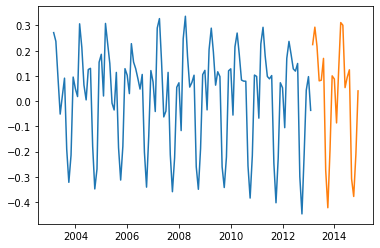

In [156]:
plt.plot(train_data)
plt.plot(test_data)

In [162]:
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(data,order=(1,1,1))
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,0,2))



In [163]:
m_fit = model.fit()

In [164]:
m_fit.bic

-144.60805236806635

In [159]:
m_fit.forecast()


array([-0.06501884])

In [160]:
orignal_value = log_diff_data2[120]

In [161]:
evalute_arima_model(train_data,test_data,p_value,d_value,q_value)


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

error

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

error

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARI